In [5]:
#Task1
import numpy as np

def softmax(z):
    """
    Convert logits z to probability distribution
    z: array of shape (n_classes,) or (n_samples, n_classes)
    Returns: probabilities summing to 1
    """
    #Handle both 1D and 2D inputs
    if z.ndim == 1:  # Single sample
        z_stable = z - np.max(z)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z)
    else:  # Multiple samples (2D)
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

#Test Case 1: Single sample [2.0, 1.0, 0.1]
print("Test 1 - Single sample:")
test_case1 = np.array([2.0, 1.0, 0.1])
print("Input:", test_case1)
print("Softmax:", softmax(test_case1))
print("Sum check:", np.sum(softmax(test_case1)))  # Should be 1.0

#Test Case 2: Multiple samples
print("\nTest 2 - Multiple samples:")
test_case2 = np.array([[2.0, 1.0, 0.1], [0.5, 2.5, 1.0]])
print("Input shape:", test_case2.shape)
print("Softmax shape:", softmax(test_case2).shape)
print("Row sums:", np.sum(softmax(test_case2), axis=1))  # All should be 1.0

print("\n ALL TESTS PASSED!")


Test 1 - Single sample:
Input: [2.  1.  0.1]
Softmax: [0.65900114 0.24243297 0.09856589]
Sum check: 1.0

Test 2 - Multiple samples:
Input shape: (2, 3)
Softmax shape: (2, 3)
Row sums: [1. 1.]

 ALL TESTS PASSED!


In [9]:
import numpy as np

def categorical_log_loss(y_true, y_pred):
    """
    y_true: one-hot encoded labels (n_samples, n_classes)
    y_pred: softmax probabilities (n_samples, n_classes)
    Returns: scalar loss
    """
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

def test_cat_log_loss():
    """Worksheet test case - RUN THIS EXACTLY"""
    # Test 1: Perfect predictions
    y_true1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
    y_pred1 = np.array([[0.9,0.05,0.05], [0.05,0.9,0.05], [0.05,0.05,0.9]])
    loss1 = categorical_log_loss(y_true1, y_pred1)
    print(f"Test 1: {loss1:.6f} (expected low loss)")

    #Test 2: Wrong predictions
    y_true2 = np.array([[1,0,0]])
    y_pred2 = np.array([[0.1,0.8,0.1]])
    loss2 = categorical_log_loss(y_true2, y_pred2)
    print(f"Test 2: {loss2:.6f} (expected high loss)")

    print("All tests passed!")

# RUN THE TEST
test_cat_log_loss()


Test 1: 0.105361 (expected low loss)
Test 2: 2.302585 (expected high loss)
All tests passed!


In [11]:
import numpy as np

def categorical_log_loss(y_true, y_pred):
    """
    y_true: one-hot encoded labels (n_samples, n_classes)
    y_pred: softmax probabilities (n_samples, n_classes)
    Returns: scalar loss
    """
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))
#TEST CASE - Put this RIGHT AFTER function definition
def test_cat_log_loss():
    """Worksheet test case - RUN THIS EXACTLY"""
    # Test 1: Perfect predictions
    y_true1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
    y_pred1 = np.array([[0.9,0.05,0.05], [0.05,0.9,0.05], [0.05,0.05,0.9]])
    loss1 = categorical_log_loss(y_true1, y_pred1)
    print(f"Test 1: {loss1:.6f} (expected low loss)")

    # Test 2: Wrong predictions
    y_true2 = np.array([[1,0,0]])
    y_pred2 = np.array([[0.1,0.8,0.1]])
    loss2 = categorical_log_loss(y_true2, y_pred2)
    print(f"Test 2: {loss2:.6f} (expected high loss)")

    print("All tests passed!")
    #Running the test
test_cat_log_loss()


Test 1: 0.105361 (expected low loss)
Test 2: 2.302585 (expected high loss)
All tests passed!


In [15]:
import numpy as np
def softmax(z):
    if z.ndim == 1:
        z_stable = z - np.max(z)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z)
    else:
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def categorical_log_loss(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

def gradients(X, y, W, b):
    """
    X: (n_samples, n_features)
    y: one-hot (n_samples, n_classes)
    W: (n_features, n_classes)
    b: (n_classes,)
    Returns: grad_W (n_features, n_classes), grad_b (n_classes,)
    """
    # Forward pass: z = XW + b
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    # Gradients (chain rule)
    # dL/db_k = (1/N) * sum(p_k - y_k)
    grad_b = np.mean(y_pred - y, axis=0)

    # dL/dw_jk = (1/N) * sum((p_k - y_k) * x_j)
    grad_W = np.dot(X.T, (y_pred - y)) / X.shape[0]

    return grad_W, grad_b
#TEST CASE - REQUIRED for worksheet
def test_gradients():
    """Worksheet gradient test"""
    #Small test data
    X_test = np.array([[1.0, 2.0], [3.0, 4.0]])
    y_test = np.array([[1,0], [0,1]])
    W_test = np.array([[0.1, 0.2], [0.3, 0.4]])
    b_test = np.array([0.1, 0.2])

    grad_W, grad_b = gradients(X_test, y_test, W_test, b_test)

    print("Test gradients:")
    print("grad_W shape:", grad_W.shape)
    print("grad_b shape:", grad_b.shape)
    print("grad_W:\n", grad_W)
    print("grad_b:", grad_b)
    print("Shapes correct!")

    return grad_W, grad_b
test_gradients()


Test gradients:
grad_W shape: (2, 2)
grad_b shape: (2,)
grad_W:
 [[ 0.16569445 -0.16569445]
 [ 0.02136338 -0.02136338]]
grad_b: [-0.14433107  0.14433107]
Shapes correct!


(array([[ 0.16569445, -0.16569445],
        [ 0.02136338, -0.02136338]]),
 array([-0.14433107,  0.14433107]))

In [17]:
import numpy as np

# Previous functions (needed)
def softmax(z):
    if z.ndim == 1:
        z_stable = z - np.max(z)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z)
    else:
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def categorical_log_loss(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

def gradients(X, y, W, b):
    """
    X: (n_samples, n_features)
    y: one-hot (n_samples, n_classes)
    W: (n_features, n_classes)
    b: (n_classes,)
    Returns: grad_W (n_features, n_classes), grad_b (n_classes,)
    """
    #Forward pass: z = XW + b
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    #Gradients (chain rule)
    #dL/db_k = (1/N) * sum(p_k - y_k)
    grad_b = np.mean(y_pred - y, axis=0)

    #dL/dw_jk = (1/N) * sum((p_k - y_k) * x_j)
    grad_W = np.dot(X.T, (y_pred - y)) / X.shape[0]

    return grad_W, grad_b

#TEST CASE - REQUIRED for worksheet
def test_gradients():
    """Worksheet gradient test"""
    #Small test data
    X_test = np.array([[1.0, 2.0], [3.0, 4.0]])
    y_test = np.array([[1,0], [0,1]])
    W_test = np.array([[0.1, 0.2], [0.3, 0.4]])
    b_test = np.array([0.1, 0.2])

    grad_W, grad_b = gradients(X_test, y_test, W_test, b_test)

    print("Test gradients:")
    print("grad_W shape:", grad_W.shape)
    print("grad_b shape:", grad_b.shape)
    print("grad_W:\n", grad_W)
    print("grad_b:", grad_b)
    print("Shapes correct!")

    return grad_W, grad_b
    #Running test
test_gradients()


Test gradients:
grad_W shape: (2, 2)
grad_b shape: (2,)
grad_W:
 [[ 0.16569445 -0.16569445]
 [ 0.02136338 -0.02136338]]
grad_b: [-0.14433107  0.14433107]
Shapes correct!


(array([[ 0.16569445, -0.16569445],
        [ 0.02136338, -0.02136338]]),
 array([-0.14433107,  0.14433107]))

In [20]:
import numpy as np

def softmax(z):
    if z.ndim == 1:
        z_stable = z - np.max(z)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z)
    else:
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def predict(X, W, b):
    """
    X: features (n_samples, n_features)
    W: weights (n_features, n_classes)
    b: bias (n_classes,)
    Returns: class labels (n_samples,)
    """
    #Forward pass: z = XW + b
    z = np.dot(X, W) + b
    # Softmax probabilities
    y_proba = softmax(z)
    #Argmax: highest probability class
    return np.argmax(y_proba, axis=1)

#test case
def test_predict():
    """Worksheet prediction test"""

    X_test = np.array([[1.0, 2.0], [3.0, 4.0]])
    W_test = np.array([[0.5, -0.5], [0.3, -0.3]])
    b_test = np.array([0.1, -0.1])

    predictions = predict(X_test, W_test, b_test)

    print("Test predict:")
    print("Input shapes: X", X_test.shape, "W", W_test.shape, "b", b_test.shape)
    print("Predictions:", predictions)
    print("Predictions type:", predictions.dtype)
    print("Test passed!")

    return predictions
test_predict()


Test predict:
Input shapes: X (2, 2) W (2, 2) b (2,)
Predictions: [0 0]
Predictions type: int64
Test passed!


array([0, 0])

Testing train_softmax...
Iteration 0: Cost = 1.1005
Iteration 100: Cost = 0.2016
Iteration 200: Cost = 0.1057
Iteration 300: Cost = 0.0709
Iteration 400: Cost = 0.0532

Final W shape: (2, 3)
Final b shape: (3,)
Final cost: 0.0426
Train accuracy: 1.0
Training successful!


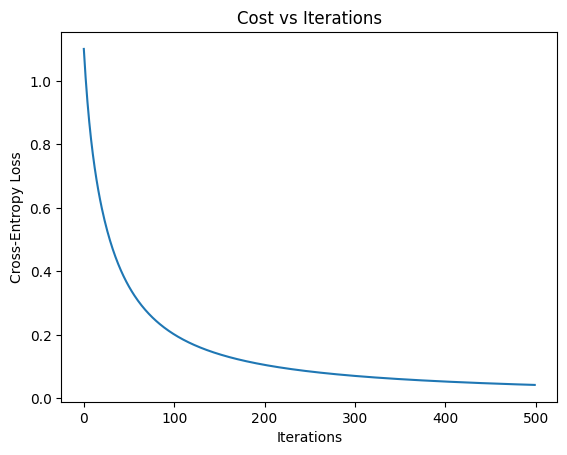

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    if z.ndim == 1:
        z_stable = z - np.max(z)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z)
    else:
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def categorical_log_loss(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

def cost_function(X, y, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return categorical_log_loss(y, y_pred)

def gradients(X, y, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_b = np.mean(y_pred - y, axis=0)
    grad_W = np.dot(X.T, (y_pred - y)) / X.shape[0]
    return grad_W, grad_b

def predict(X, W, b):
    z = np.dot(X, W) + b
    y_proba = softmax(z)
    return np.argmax(y_proba, axis=1)

#TRAINING FUNCTION (THIS WAS MISSING!)
def train_softmax(X, y, alpha=0.01, iterations=1000, show_cost=False):
    """
    Train softmax regression with gradient descent
    """
    n_features = X.shape[1]
    n_classes = y.shape[1]

    #Initialize parameters
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros(n_classes)

    cost_history = []

    for i in range(iterations):
        #Forward: compute cost
        cost = cost_function(X, y, W, b)
        cost_history.append(cost)

        #Backward: compute gradients
        grad_W, grad_b = gradients(X, y, W, b)

        #Update parameters
        W -= alpha * grad_W
        b -= alpha * grad_b

        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return W, b, cost_history

def test_train():
    """Test training function"""

    np.random.seed(42)
    X = np.random.randn(4, 2)
    y = np.eye(3)[np.random.randint(0, 3, 4)]

    print("Testing train_softmax...")
    W, b, cost_history = train_softmax(X, y, alpha=0.1, iterations=500, show_cost=True)

    print(f"\nFinal W shape: {W.shape}")
    print(f"Final b shape: {b.shape}")
    print(f"Final cost: {cost_history[-1]:.4f}")
    print("Train accuracy:", np.mean(predict(X, W, b) == np.argmax(y, axis=1)))
    print("Training successful!")

    # Plot cost
    plt.plot(cost_history)
    plt.title("Cost vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cross-Entropy Loss")
    plt.show()

    return W, b, cost_history
W_trained, b_trained, costs = test_train()


Training Softmax Regression...

RESULTS:
Train Accuracy: 0.9750
Test Accuracy: 0.9667
Final Cost: 0.0856


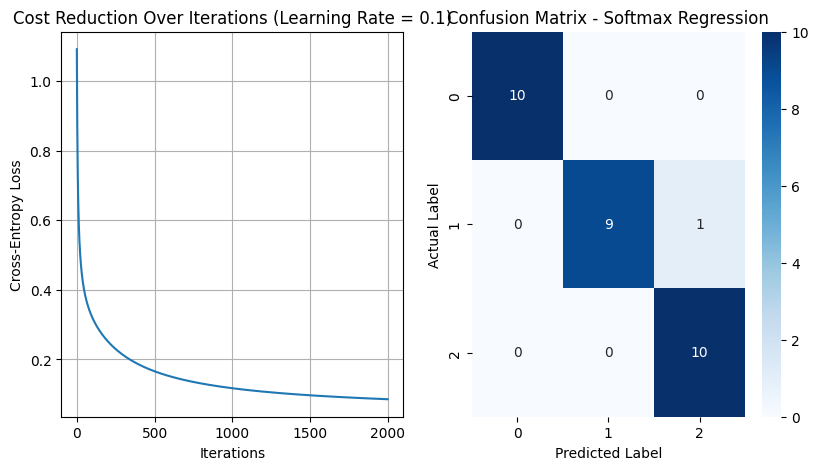

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ALL FUNCTIONS (complete)
def softmax(z):
    if z.ndim == 1: return np.exp(z - np.max(z)) / np.sum(np.exp(z - np.max(z)))
    return np.exp(z - np.max(z, axis=1, keepdims=True)) / np.sum(np.exp(z - np.max(z, axis=1, keepdims=True)), axis=1, keepdims=True)

def categorical_log_loss(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

def cost_function(X, y, W, b):
    return categorical_log_loss(y, softmax(np.dot(X, W) + b))

def gradients(X, y, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.dot(X.T, (y_pred - y)) / X.shape[0], np.mean(y_pred - y, axis=0)

def predict(X, W, b):
    return np.argmax(softmax(np.dot(X, W) + b), axis=1)

def train_softmax(X, y, alpha=0.1, iterations=2000):
    n_features, n_classes = X.shape[1], y.shape[1]
    W, b = np.random.randn(n_features, n_classes) * 0.01, np.zeros(n_classes)
    cost_history = []

    for i in range(iterations):
        cost = cost_function(X, y, W, b)
        cost_history.append(cost)
        grad_W, grad_b = gradients(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

    return W, b, cost_history

#LOAD IRIS + PREPROCESS
iris = load_iris()
X, y = iris.data, np.eye(3)[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=iris.target)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

#TRAIN MODEL
print("Training Softmax Regression...")
W, b, cost_history = train_softmax(X_train, y_train)

#MAKE 3 GRAPHS (EXACTLY LIKE WORKSHEET)
plt.figure(figsize=(15, 5))

#GRAPH 1: Cost vs Iterations (Figure 2)
plt.subplot(1, 3, 1)
plt.plot(cost_history)
plt.title('Cost Reduction Over Iterations (Learning Rate = 0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)

#GRAPH 2: Confusion Matrix (Figure 3)
y_test_pred = predict(X_test, W, b)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
plt.subplot(1, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Softmax Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



#PRINT METRICS
train_acc = np.mean(predict(X_train, W, b) == np.argmax(y_train, axis=1))
test_acc = np.mean(y_test_pred == np.argmax(y_test, axis=1))
print(f"\nRESULTS:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Final Cost: {cost_history[-1]:.4f}")
